In [1]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import warnings
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Read the CSV file into a pandas dataframe
sales_df = pd.read_csv(r"D:\Subhashini\Datascience\final-retail_sales_forecast\sales_data_set.csv")
store_df = pd.read_csv(r"D:\Subhashini\Datascience\final-retail_sales_forecast\stores_data_set.csv")
Feature_df= pd.read_csv(r"D:\Subhashini\Datascience\final-retail_sales_forecast\Features_data_set.csv")
print(sales_df.head(5))
print(sales_df.shape)
print(store_df.head(5))
print(store_df.shape)
print(Feature_df.head(5))
print(Feature_df.shape)

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False
(421570, 5)
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
(45, 3)
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN 

In [3]:
sales_df=pd.merge(sales_df,store_df, on=['Store'], how='inner')
merge_df = pd.merge(sales_df, Feature_df, on=['Date','Store','IsHoliday'],how='inner')
merge_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,26/10/2012,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,26/10/2012,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,26/10/2012,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,26/10/2012,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [4]:
print(merge_df.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64


In [5]:
merge_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = merge_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

In [6]:
print(merge_df.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [7]:
merge_df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [8]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [9]:
merge_df['Date'] = pd.to_datetime(merge_df['Date'], format='%d/%m/%Y')

In [10]:
#Categorical column
# Explore unique values of the 'Type' column
unique_types = merge_df['Type'].unique()
print("Unique values in 'Type':", unique_types)

# Explore unique values of the 'IsHoliday' column
unique_holidays = merge_df['IsHoliday'].unique()
print("Unique values in 'IsHoliday':", unique_holidays)

Unique values in 'Type': ['A' 'B' 'C']
Unique values in 'IsHoliday': [False  True]


In [11]:
# Convert 'Date' column to datetime type if not already done
merge_df['Date'] = pd.to_datetime(merge_df['Date'], format='%d/%m/%Y')

# Extract day, month, and year
merge_df['Day'] = merge_df['Date'].dt.day
merge_df['Month'] = merge_df['Date'].dt.month
merge_df['Year'] = merge_df['Date'].dt.year

# Display the updated DataFrame
print(merge_df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50      False    A  151315        42.31   
1      1     2 2010-02-05      50605.27      False    A  151315        42.31   
2      1     3 2010-02-05      13740.12      False    A  151315        42.31   
3      1     4 2010-02-05      39954.04      False    A  151315        42.31   
4      1     5 2010-02-05      32229.38      False    A  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   
1       2.572        0.0        0.0        0.0        0.0        0.0   
2       2.572        0.0        0.0        0.0        0.0        0.0   
3       2.572        0.0        0.0        0.0        0.0        0.0   
4       2.572        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  Day  Month  Year  
0  211.096358         8.106    5      

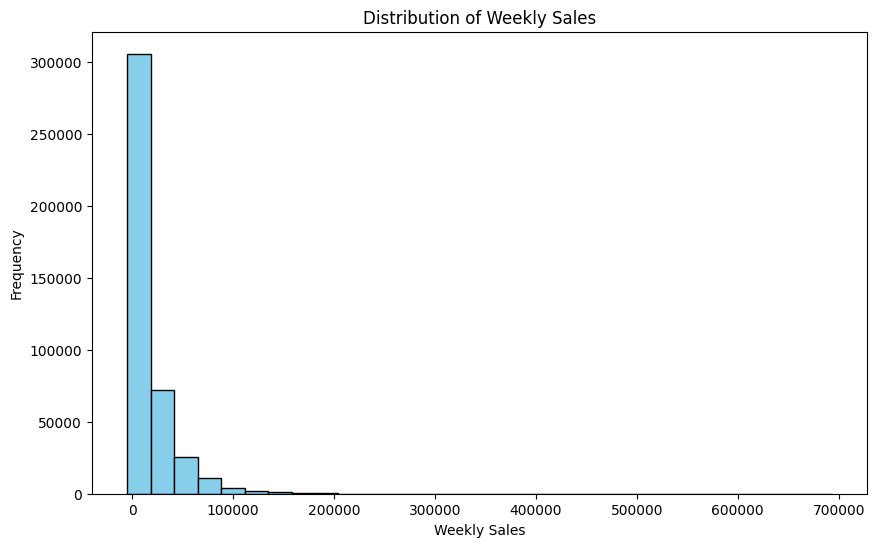

In [12]:
# Histogram of Weekly Sales
plt.figure(figsize=(10, 6))
plt.hist(merge_df['Weekly_Sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

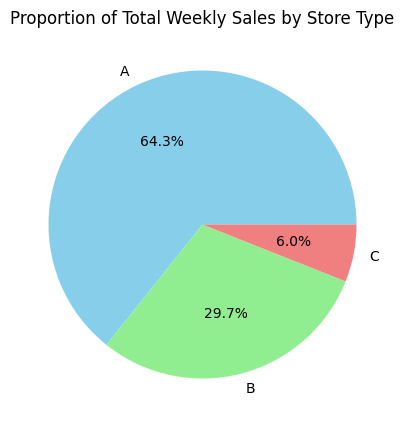

In [13]:
# Aggregate total sales by store type
total_sales_by_type = merge_df.groupby('Type')['Weekly_Sales'].sum()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(total_sales_by_type, labels=total_sales_by_type.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Proportion of Total Weekly Sales by Store Type')
plt.show()

Correlation Analysis:

In [14]:
# Exclude non-numeric columns ('Type' and other categorical columns) from correlation analysis
numeric_columns = merge_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = merge_df[numeric_columns].corr()

# Extract correlations with the target variable ('Weekly_Sales')
correlations_with_sales = correlation_matrix['Weekly_Sales'].sort_values(ascending=False)

# Display the correlations
print("Correlation with Weekly Sales:")
print(correlations_with_sales)
# value of the correlation coefficient varies between +1 and -1.

Correlation with Weekly Sales:
Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.050465
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown2       0.020716
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64


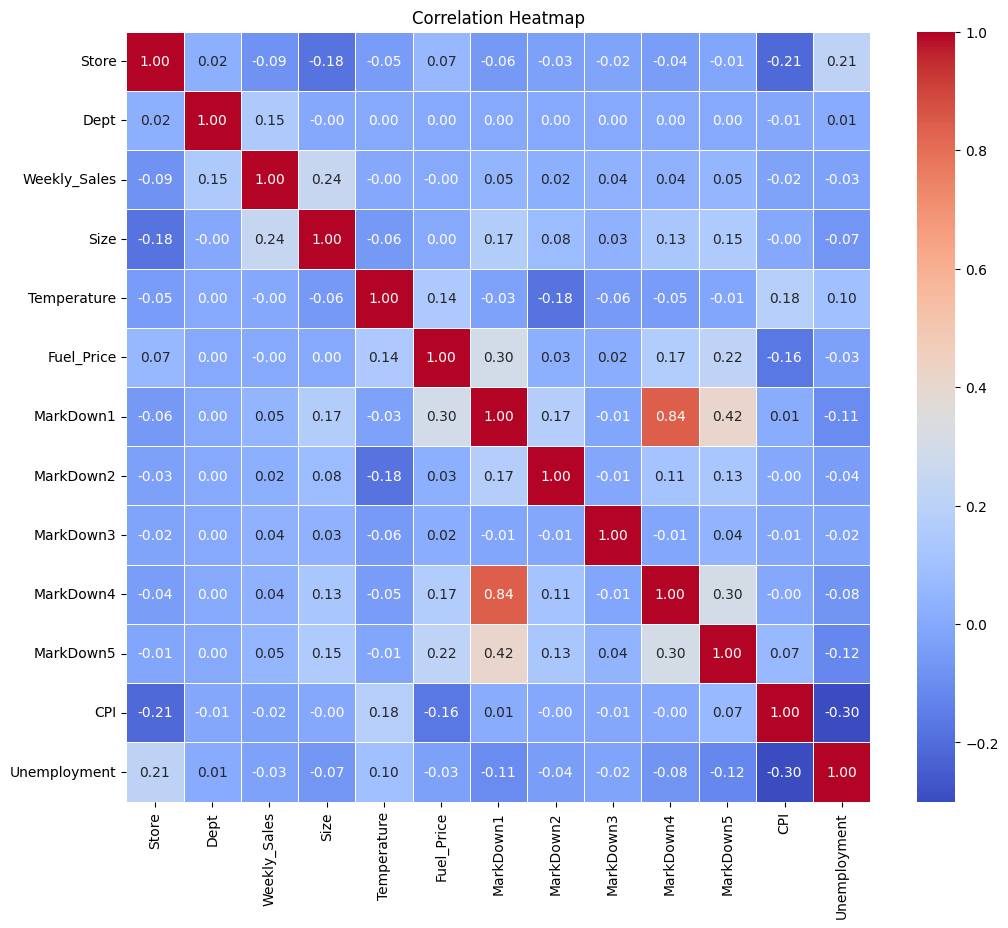

In [15]:
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In this example, X_train and y_train represent the features and target variable of the training set, while X_test and y_test represent the features and target variable of the testing set. The test_size parameter determines the proportion of the data allocated to the testing set (here set to 20%).

In [19]:
# Convert 'Date' column to datetime format
merge_df['Date'] = pd.to_datetime(merge_df['Date'])

# Convert 'Date' to timestamp (numeric representation)
merge_df['Date'] = merge_df['Date'].astype(np.int64) // 10**9  # Converting to seconds

In [17]:
merge_df['Date'] = pd.to_datetime(merge_df['Date'])
merge_df['Days_Since_Start'] = (merge_df['Date'] - merge_df['Date'].min()).dt.days

In [20]:
print(merge_df[['Date', 'Weekly_Sales']].dtypes)

Date              int64
Weekly_Sales    float64
dtype: object


In [21]:
print(merge_df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'Days_Since_Start'],
      dtype='object')


In [22]:
print(merge_df['Days_Since_Start'].apply(type).unique())

[<class 'int'>]


In [23]:
merge_df = merge_df.drop(columns=['Date'])

In [24]:
# Keep relevant features for predicting department-wise sales
relevant_columns = ['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Month', 'Year', 'Days_Since_Start']

# Select only the relevant columns
merge_df1 = merge_df[relevant_columns]

In [25]:
from sklearn.model_selection import train_test_split

# 'X' contains the features, and 'y' contains the target variable ('Weekly_Sales')
X = merge_df1.drop('Weekly_Sales', axis=1)  # Features
y = merge_df1['Weekly_Sales']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("Training set shape - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set shape - Features:", X_test.shape, "Target:", y_test.shape)

Training set shape - Features: (337256, 14) Target: (337256,)
Testing set shape - Features: (84314, 14) Target: (84314,)


In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 14548.796048073575
Mean Squared Error: 492431660.4489998
R-squared: 0.06332860107214455


To capture the effects of markdowns during holiday weeks and analyze their impact on sales

Mean Squared Error: 485848965.5580571
R-squared: 0.07584977411490235


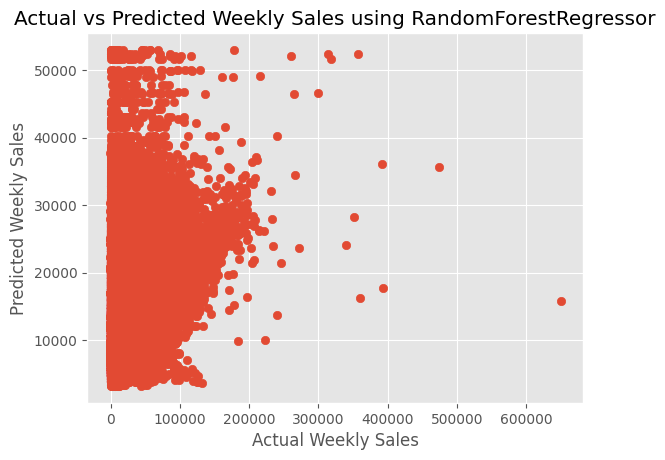

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 'X' contains the features, and 'y' contains the target variable ('Weekly_Sales')
X = merge_df1.drop('Weekly_Sales', axis=1)  # Features
y = merge_df1['Weekly_Sales']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_rf = clf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs Predicted Weekly Sales using RandomForestRegressor")
plt.show()

Gradient Boosting Regressor

In [51]:
from xgboost import XGBRegressor

# Create the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)


In [52]:
# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Absolute Error (XGBoost): {mae_xgb}')
print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'R-squared (XGBoost): {r2_xgb}')

Mean Absolute Error (XGBoost): 14290.77191346392
Mean Squared Error (XGBoost): 475331699.42510086
R-squared (XGBoost): 0.09585503204789225


In [50]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 259.2 kB/s eta 0:06:25
   ---------------------------------------- 0.1/99.8 MB 798.9 kB/s eta 0:02:05
   ---------------------------------------- 0.4/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 1.1/99.8 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 1.7/99.8 MB 5.7 MB/s eta 0:00:18
    --------------------------------------- 2.3/99.8 MB 7.0 MB/s eta 0:00:14
   - -------------------------------------- 2.8/9

K-Nearest Neighbors (KNN) Regressor:

In [55]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Create the KNN model
knn_model = KNeighborsRegressor()

# Setup GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best parameter
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Create the KNN model with the best parameter
best_knn_model = KNeighborsRegressor(n_neighbors=best_n_neighbors)

# Fit the model to the training data
best_knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best_knn = best_knn_model.predict(X_test)

# Evaluate the model
mae_best_knn = mean_absolute_error(y_test, y_pred_best_knn)
mse_best_knn = mean_squared_error(y_test, y_pred_best_knn)
r2_best_knn = r2_score(y_test, y_pred_best_knn)

print(f'Best Mean Absolute Error (KNN): {mae_best_knn}')
print(f'Best Mean Squared Error (KNN): {mse_best_knn}')
print(f'Best R-squared (KNN): {r2_best_knn}')


Best Mean Absolute Error (KNN): 14942.328917660605
Best Mean Squared Error (KNN): 518434738.61782974
Best R-squared (KNN): 0.01386724112908122


In [29]:
print(merge_df.columns)

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'Days_Since_Start'],
      dtype='object')


In [44]:
# Extract relevant columns
sales_holiday = merge_df[['IsHoliday', 'Weekly_Sales']]

# Separate data for holidays and non-holidays
target = [sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday'] == True],
          sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday'] == False]]

labels = ['Not Holiday', 'Holiday']


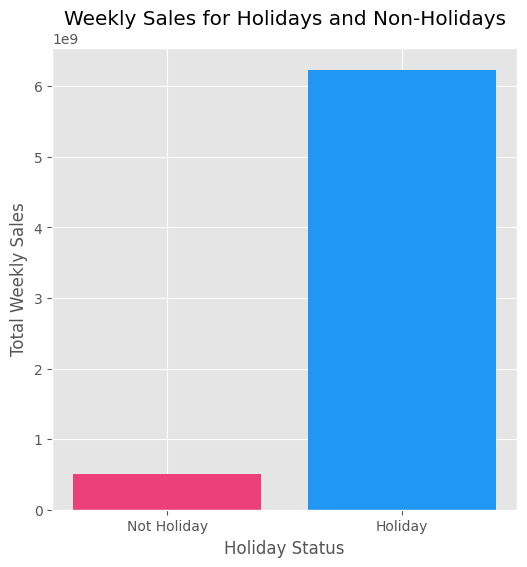

In [45]:
plt.figure(figsize=(6, 6))
plt.bar(labels, [t.sum() for t in target], color=['#EC407A', '#2196F3'])
plt.title('Weekly Sales for Holidays and Non-Holidays')
plt.xlabel('Holiday Status')
plt.ylabel('Total Weekly Sales')
plt.show()

<Axes: xlabel='Dept'>

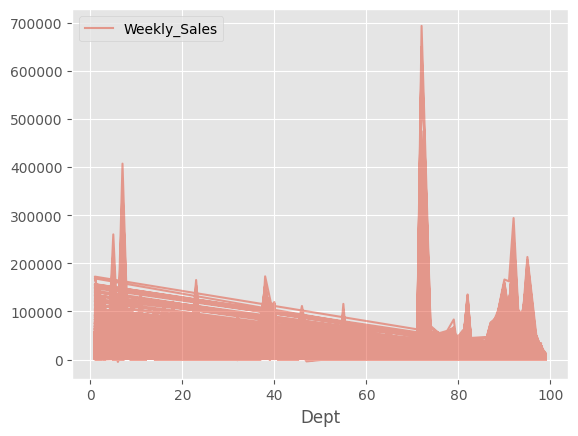

In [47]:
merge_df.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=0.5, fig=(4.5))

Sales on holiday is a little bit more than sales in not-holiday
From this plot, we notice the Department with the highest sales lies between Dept 60 and 80

In [41]:
# Create binary indicator for holiday weeks 
merge_df['Is_Holiday_Week'] = merge_df['IsHoliday']

# Create separate features for each markdown during holiday weeks
merge_df['MarkDown1_Holiday'] = merge_df['MarkDown1'] * merge_df['Is_Holiday_Week']
merge_df['MarkDown2_Holiday'] = merge_df['MarkDown2'] * merge_df['Is_Holiday_Week']
merge_df['MarkDown3_Holiday'] = merge_df['MarkDown3'] * merge_df['Is_Holiday_Week']
merge_df['MarkDown4_Holiday'] = merge_df['MarkDown4'] * merge_df['Is_Holiday_Week']
merge_df['MarkDown5_Holiday'] = merge_df['MarkDown5'] * merge_df['Is_Holiday_Week']

c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Pragadheesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

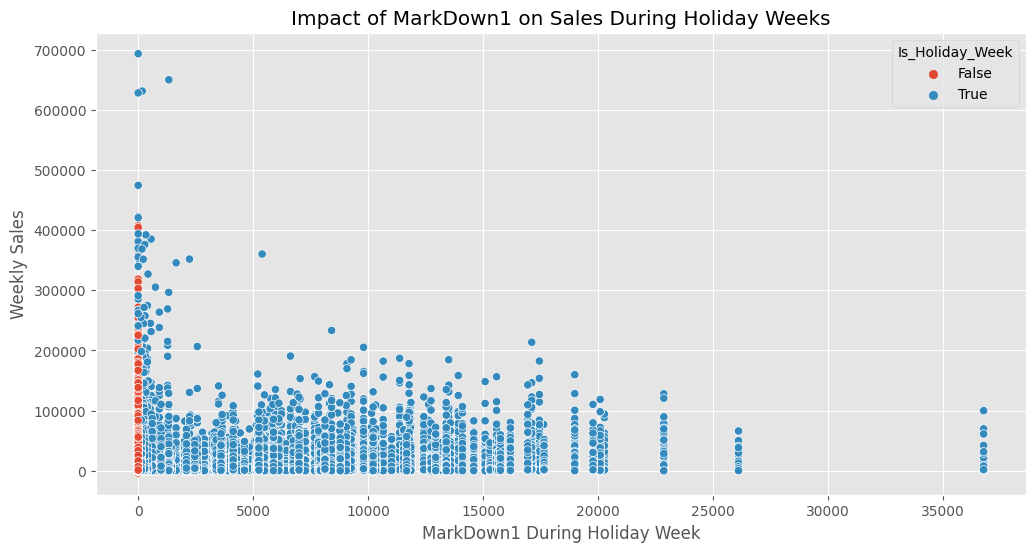

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize impact of MarkDown1 during holiday weeks
plt.figure(figsize=(12, 6))
sns.scatterplot(x='MarkDown1_Holiday', y='Weekly_Sales', hue='Is_Holiday_Week', data=merge_df)
plt.title('Impact of MarkDown1 on Sales During Holiday Weeks')
plt.xlabel('MarkDown1 During Holiday Week')
plt.ylabel('Weekly Sales')
plt.show()

In [43]:
import statsmodels.api as sm

# Define features and target
features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Is_Holiday_Week',
            'MarkDown1_Holiday', 'MarkDown2_Holiday', 'MarkDown3_Holiday', 'MarkDown4_Holiday', 'MarkDown5_Holiday']

# Add interaction terms
for feature in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    merge_df[f'{feature}_Holiday_Interact'] = merge_df[feature] * merge_df['Is_Holiday_Week']

# Fit regression model
X = sm.add_constant(merge_df[features])
y = merge_df[target]
model = sm.OLS(y, X).fit()

# Display model summary
print(model.summary())

TypeError: unhashable type: 'Series'

In [275]:
print(merge_df['IsHoliday'].dtype)

bool
